# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_loader import JesterV1
from network.R3D import R3D

import warnings
warnings.filterwarnings('ignore', message = 'The default value of the antialias parameter of all the resizing transforms*')

In [2]:
# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
    # Get the name of the GPU
    print('GPU Device Name:', torch.cuda.get_device_name(0)) # Change the device index if you have multiple GPUs
else:
    device = torch.device('cpu')
    print('GPU not available, using CPU instead')
    
print('Selected device:', device)

GPU not available, using CPU instead
Selected device: cpu


# Load dataset

Set training parameters

In [3]:
batch_size = 1
num_epochs = 10
learning_rate = 0.001
num_workers = 4 # Number of threads for data loading
validation_interval = 1 # Perform validation every n epochs

Create an instance of the dataset

In [4]:
# Define dataset
data_dir = '..\datasets\JESTER-V1'

# Define transformations
transform_1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((96, 96)),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

transform_2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((96, 96)),
])

transform = transform_2

# Create an instance of the dataset
train_dataset = JesterV1(
    data_dir = data_dir,
    num_frames = 30,
    transform = transform,
    mode = 'train',
) # Train dataset
val_dataset = JesterV1(
    data_dir = data_dir,
    num_frames = 30,
    transform = transform,
    mode = 'val',
) # Validation dataset

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True, num_workers = num_workers) # Train data loader
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True, num_workers = num_workers) # Validation data loader

Double-check dataset

In [5]:
# Length of DataLoader
print("Number of batches:", len(train_loader))
# Inspect a batch
for frames, labels in train_loader:
    print("Shape of frames tensor:", frames.shape)
    print("Shape of labels tensor:", labels.shape)
    break
# Length of Dataset
print("Number of samples:", train_dataset.__len__())

Number of batches: 118562
Shape of frames tensor: torch.Size([1, 3, 30, 96, 96])
Shape of labels tensor: torch.Size([1])
Number of samples: 118562


tensor([21])


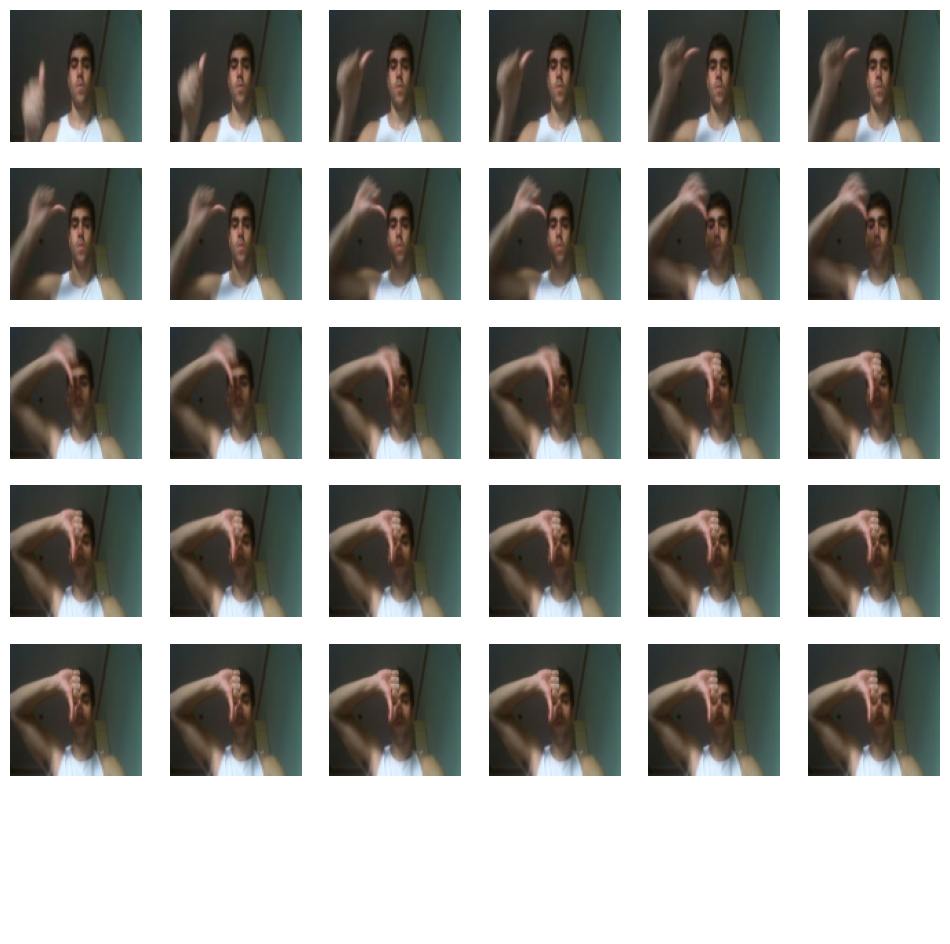

In [6]:
# Visualize a batch of frames
for frames, labels in train_loader:
    print(labels) # Print the labels
    # Get the first sample of the batch
    batch = frames.permute(0, 2, 1, 3, 4)
    images = batch[0]
    
    # Plot the images
    h, w = 0, 0
    fig, ax = plt.subplots(6, 6, figsize = (12, 12))
    # Transpose the images
    images.permute(1, 0, 2, 3)
    # Plot the images
    for image in images:
        ax[h, w].imshow(image.permute(1, 2, 0)) # Transpose the image to (H, W, C)
        ax[h, w].axis('off')
        w += 1
        if w == 6:
            h += 1
            w = 0
    remain = 36 - images.shape[0]
    # Remove the remaining axes
    for i in range(remain):
        ax[h, w].axis('off')
        w += 1
        if w == 6:
            h += 1
            w = 0
    # Display the plot
    plt.show()
    
    break

# Plot logs

In [7]:
# Read the logs file
path = 'logs/r2plus1d-18_0-mp.csv'
logs = pd.read_csv(path)

# Extract the columns
epochs = logs['epochs']
train_loss = logs['train_loss']
train_acc = logs['train_acc']
val_acc = logs['val_acc']

Plot train_loss

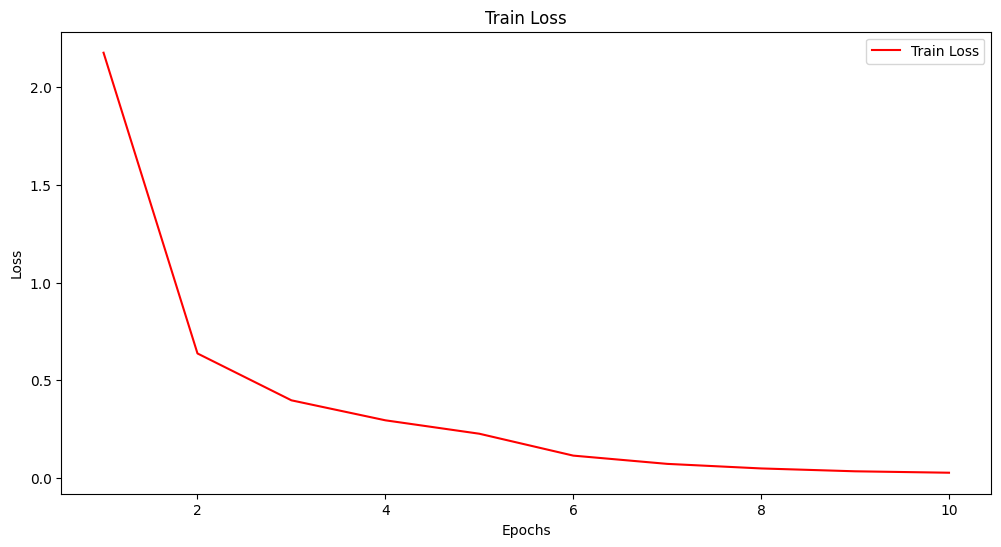

In [8]:
# Plot the training loss
plt.figure(figsize = (12, 6))
plt.plot(epochs, train_loss, label = 'Train Loss', color = 'red')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Save the plot
plt.savefig('plots/train_loss.png')
plt.show()

Plot train_acc

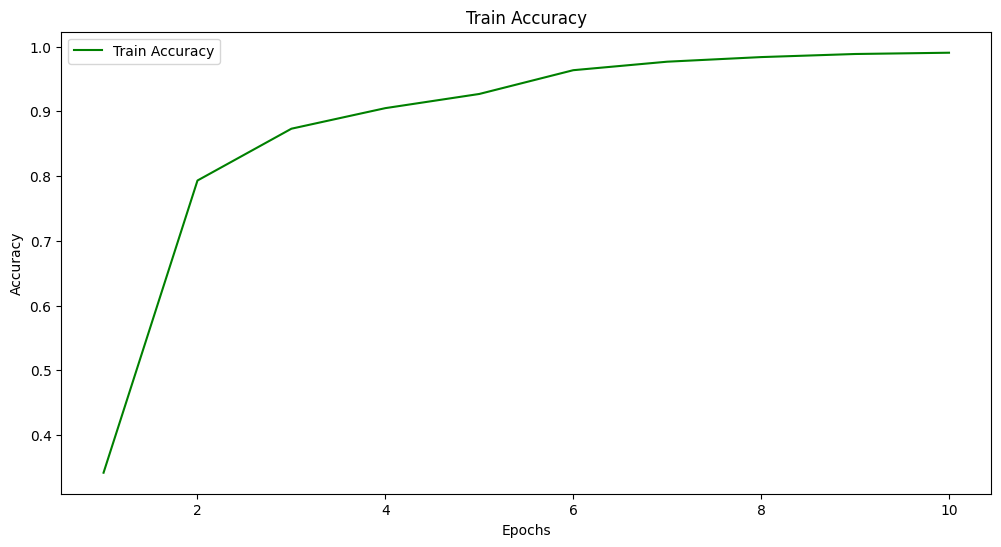

In [9]:
# Plot the training accuracy
plt.figure(figsize = (12, 6))
plt.plot(epochs, train_acc, label = 'Train Accuracy', color = 'green')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the plot
plt.savefig('plots/train_acc.png')
plt.show()

Plot val_acc

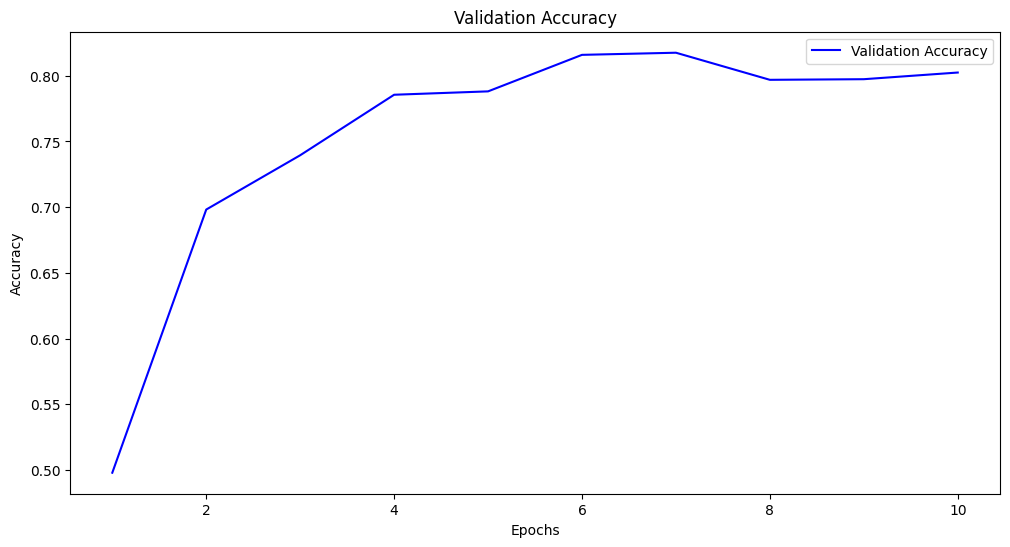

In [10]:
# Plot the training loss
plt.figure(figsize = (12, 6))
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'blue')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the plot
plt.savefig('plots/val_acc.png')
plt.show()